# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Load data

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv", sep = ',')
#print(df.info())
print(df.head(10))
#print(df.describe())
print(df.columns)
print(df.info())
print(df.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

# Data Preprocessing

In [3]:
# Strip spaces, replace blanks with NaN, convert to numeric
df["TotalCharges"] = (
    df["TotalCharges"]
    .replace(" ", np.nan)        # blanks to NaN
    .replace("", np.nan)         # empty strings to NaN
)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") 
df = df.dropna() # drop rows with missing data
df = df.drop(columns = ["customerID"])
df["Churn"] = (df["Churn"].replace('Yes',1).replace('No',0))


categorical_cols = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"
]

telecom_cust_dummies= pd.get_dummies(df, columns=categorical_cols, drop_first=True)
telecom_cust_dummies = telecom_cust_dummies.astype(int)

print(telecom_cust_dummies.info())
print(telecom_cust_dummies.shape)
print(telecom_cust_dummies.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   SeniorCitizen                          7032 non-null   int32
 1   tenure                                 7032 non-null   int32
 2   MonthlyCharges                         7032 non-null   int32
 3   TotalCharges                           7032 non-null   int32
 4   Churn                                  7032 non-null   int32
 5   gender_Male                            7032 non-null   int32
 6   Partner_Yes                            7032 non-null   int32
 7   Dependents_Yes                         7032 non-null   int32
 8   PhoneService_Yes                       7032 non-null   int32
 9   MultipleLines_No phone service         7032 non-null   int32
 10  MultipleLines_Yes                      7032 non-null   int32
 11  InternetService_Fiber optic        

C:\Users\juleigar\AppData\Local\Temp\ipykernel_65880\3346841885.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = (df["Churn"].replace('Yes',1).replace('No',0))


# Data visualization

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192922
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


C:\Users\juleigar\AppData\Local\Temp\ipykernel_65880\3865320801.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


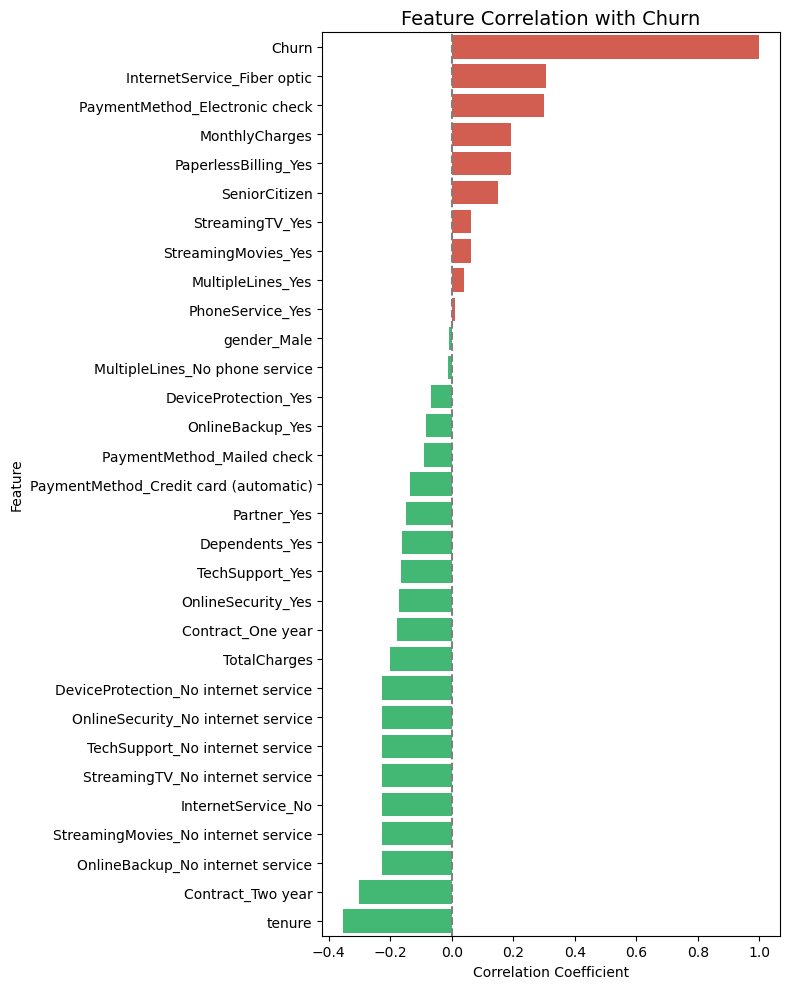

In [4]:
corr = telecom_cust_dummies.corr(numeric_only=True)
print(corr["Churn"].sort_values(ascending=False))


# Extract correlations with 'Churn'
churn_corr = corr['Churn'].sort_values(ascending=False)
print(churn_corr)
plt.figure(figsize=(8,10))
sns.barplot(
    x=churn_corr.values,
    y=churn_corr.index,
    palette=['#e74c3c' if x > 0 else '#2ecc71' for x in churn_corr.values]
)
plt.title('Feature Correlation with Churn', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


Top Positive correlation Features(increase likelihoodo of Churn).

| Feature                                   | Correlation                                                                                                               ----------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- 
| **InternetService_Fiber optic (0.31)**| Customers with fiber optic internet are more likely to churn — possibly due to higher cost or performance |issues.         |                |
| **PaymentMethod_Electronic check (0.30)** | Those who pay via electronic check tend to churn more — this payment type might reflect less engaged or short-term users. |                |
| **MonthlyCharges (0.19)**         | Higher monthly charges → higher churn. Cost sensitivity is likely a river.                                               |               
| **PaperlessBilling_Yes (0.19)**           | Paperless customers churn more — possibly correlated with electronic payment users or younger, more transient       customers.  |                |
| **SeniorCitizen (0.15)**          | Senior citizens show higher churn, maybe due to changing needs or service complexity.                                     |   

Top Negative coefficient Features(Reduce likelihood of churn)
| Feature                                           | Correlation                                                                    
| ------------------------------------------------- | -------------------------------------------------------------------------------
| **Contract_Two year (-0.30)**                     | Long-term contracts = loyal customers. Major retention factor.                  
| **tenure (-0.35)**                                | Longer tenure = lower churn — your strongest retention signal.                  
| **TotalCharges (-0.20)**                          | Higher accumulated spending (i.e., long-time customers) = less likely to churn. 
| **TechSupport_Yes (-0.16)**                       | Support access reduces churn — indicates engagement.                           
| **OnlineSecurity_Yes (-0.17)**                    | Security add-ons tie customers closer to the service.                           
| **Partner_Yes, Dependents_Yes (~-0.15)**          | Customers with partners or dependents are more stable and churn less.           
| **PaymentMethod_Credit card (automatic) (-0.13)** | Auto-pay users churn less — frictionless billing promotes retention.            
| **Contract_One year (-0.18)**                     | Even a 1-year contract reduces churn significantly.                            


# Histogram of Tenure

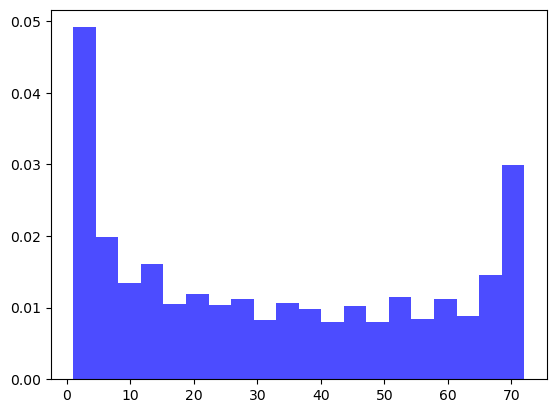

In [5]:
plt.hist(telecom_cust_dummies['tenure'], 20, density =1,facecolor="blue", alpha=0.7)
plt.show()

# Scatterplot of Monthly Charges vs Total Charges

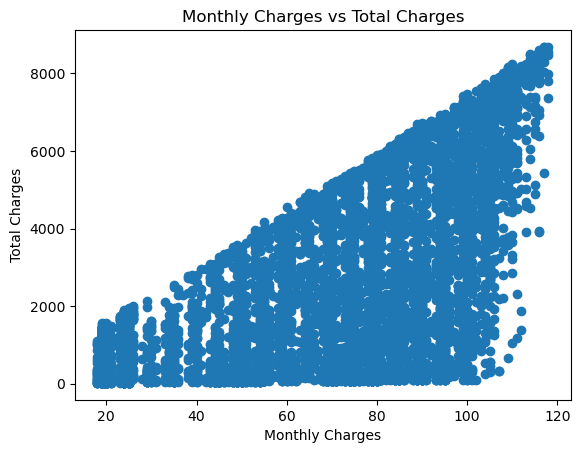

In [6]:
plt.scatter(x=telecom_cust_dummies["MonthlyCharges"], y = telecom_cust_dummies["TotalCharges"])
plt.title("Monthly Charges vs Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.show()

# Box plot tenure vs churned

C:\Users\juleigar\AppData\Local\Temp\ipykernel_65880\3378097386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


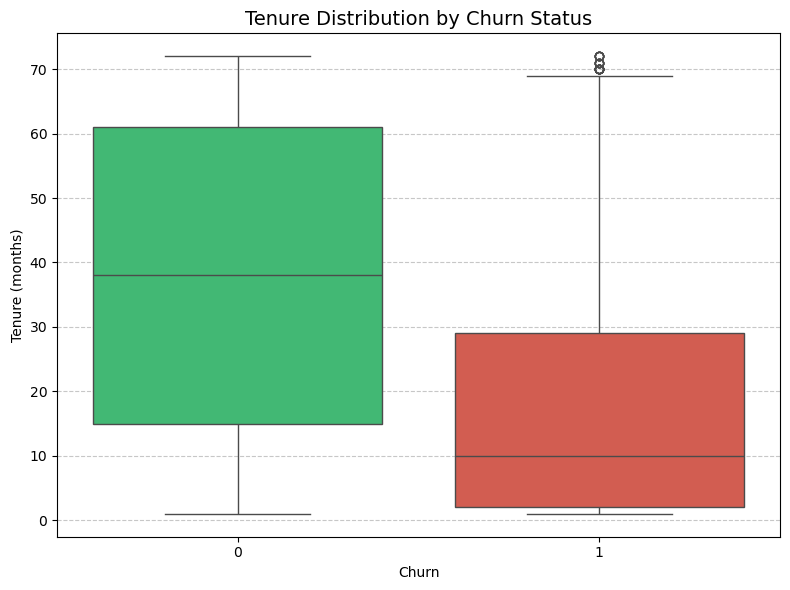

In [7]:

plt.figure(figsize=(8,6))
sns.boxplot(
    x='Churn', 
    y='tenure', 
    data=telecom_cust_dummies, 
    palette=['#2ecc71','#e74c3c']  # green = no churn, red = churn
)

plt.title('Tenure Distribution by Churn Status', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Interpretation 
Customers with shorter tenure are far more likely to churn, suggesting:
Churn risk is highest during the first year of service.
Strengthening onboarding, engagement, and satisfaction early on could improve retention

# Scale Data

In [8]:
# Scale only numeric columns
from sklearn.preprocessing import MinMaxScaler
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
telecom_cust_dummies[num_cols] = scaler.fit_transform(telecom_cust_dummies[num_cols])

# Define Independent and Dependent Variables
# **Split Data into Training and Test Sets**

In [9]:
X = telecom_cust_dummies.drop(columns = "Churn")
y = telecom_cust_dummies["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, random_state=42)


# Logistic Regression Model

In [10]:
model_log = LogisticRegression(class_weight='balanced', max_iter=1000)
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)
score = model_log.score(X_test, y_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {acc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1 Score: {f1}')

Accuracy: 0.7383390216154722
Precision: 0.49862637362637363
Recall: 0.7925764192139738
f1 Score: 0.612141652613828


The model is fairly accurate overall, but it’s missing many true positives (low recall).

# Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and tune the Random Forest classifier
model_rf = RandomForestClassifier(
    n_estimators=2000,      # number of trees
    oob_score=True,         # enable out-of-bag estimation
    max_features='sqrt',    # number of features to consider when looking for the best split
    max_leaf_nodes=50,      # limit the number of leaf nodes
    bootstrap=True,         # activate bootstrapping
    random_state=42,
    n_jobs=-1
)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate metrics (make sure y_test comes first)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Calculate OOB error
oob_error = 1 - model_rf.oob_score_

# Print results
print(f'Accuracy: {acc_rf:.6f}')
print(f'Precision: {precision_rf:.6f}')
print(f'Recall: {recall_rf:.6f}')
print(f'F1 Score: {f1_rf:.6f}')
print(f'OOB Score: {model_rf.oob_score_:.6f}')
print(f'OOB Error Estimation: {oob_error:.6f}')


Accuracy: 0.792378
Precision: 0.643077
Recall: 0.456332
F1 Score: 0.533844
OOB Score: 0.807546
OOB Error Estimation: 0.192454


Interpretation
The OOB score being slightly higher than test accuracy (0.808 vs 0.792) suggests your model generalizes well — not overfitting.
The precision (0.64) is solid — the model is relatively careful when it predicts churn.
The recall (0.46) is lower — it misses some churners, meaning it could be improved to capture more true churners.

# Confusion Matrix


Confusion Matrix - Random Forest:
 [[1184  116]
 [ 249  209]]

Confusion Matrix - Logistic Regression:
 [[1154  146]
 [ 221  237]]


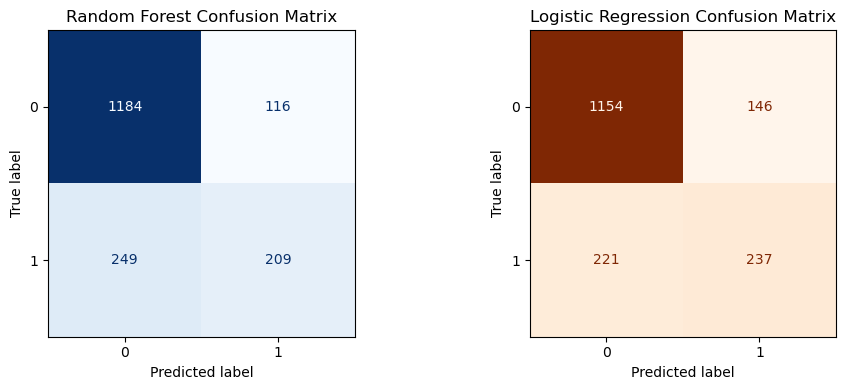


--- Model Comparison ---
Random Forest → Precision: 0.6431, Recall: 0.4563
Logistic Regression → Precision: 0.6188, Recall: 0.5175


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Train the Logistic Regression model ---
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# --- Confusion Matrices ---
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_log = confusion_matrix(y_test, y_pred_log)

print("\nConfusion Matrix - Random Forest:\n", cm_rf)
print("\nConfusion Matrix - Logistic Regression:\n", cm_log)

# Optional: Display confusion matrices visually
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(cm_rf).plot(ax=ax[0], cmap='Blues', colorbar=False)
ax[0].set_title("Random Forest Confusion Matrix")

ConfusionMatrixDisplay(cm_log).plot(ax=ax[1], cmap='Oranges', colorbar=False)
ax[1].set_title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

# --- Compute precision and recall for both models ---
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)

print("\n--- Model Comparison ---")
print(f"Random Forest → Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}")
print(f"Logistic Regression → Precision: {precision_log:.4f}, Recall: {recall_log:.4f}")


1. Breakdown of the Matrices
Random Forest TN=1184	FP=116	FN=249	TP=209
Logistic Regression	TN=1154	FP=146	FN=221	TN=237

Where:
TN (True Negatives) → Non-churners correctly predicted as not churned
FP (False Positives) → Non-churners incorrectly predicted as churned
FN (False Negatives) → Churners incorrectly predicted as not churned
TP (True Positives) → Churners correctly predicted as churned

2. What This Means
Random Forest
Catches fewer true churners (TP = 209) than Logistic Regression (TP = 237).
But it also makes fewer false alarms (FP = 116) — more conservative.
It misses more churners (FN = 249) — so it has lower recall.
Interpretation: Random Forest is better at identifying who will not churn (strong on TNs), but not as strong at identifying churners (higher FNs).

 Logistic Regression
Identifies more true churners (TP = 237) — better recall.
But it also incorrectly flags more non-churners (FP = 146) — worse precision.
Slightly fewer churners missed (FN = 221 vs 249).

Interpretation: Logistic Regression is more aggressive — it catches more churners but at the cost of more false alarms.

3. Precision–Recall Comparison
Metric	Random Forest	Logistic Regression	Interpretation
Precision	Lower	Higher	Random Forest makes fewer false alarms per churn prediction.
Recall	Lower	Higher	Logistic Regression detects more actual churners.
F1-Score	Slightly lower	Slightly higher	Logistic Regression balances precision & recall better here.
4. Which Model is More Suitable?
It depends on business goal:
If  priority is not missing churners (e.g., you’d rather contact more customers even if some don’t churn), then Logistic Regression is better — higher recall.
If  priority is avoiding unnecessary actions or marketing spend, then Random Forest is better — fewer false positives and better precision.
However, considering your OOB score and generalization:
Random Forest likely generalizes more robustly, even though it’s slightly less aggressive in detecting churners.